In [1]:
# Standard imports
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-white')
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 18

In [2]:
# Read image
im = cv2.imread("ns6A3.jpg", cv2.IMREAD_GRAYSCALE)

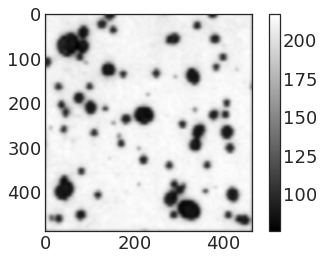

In [96]:
plt.imshow(im, cmap="gray")
plt.colorbar()

In [97]:
# Set up the detector with default parameters.
detector_default = cv2.SimpleBlobDetector_create()

In [98]:
# Detect blobs.
keypoints = detector_default.detect(im)

In [99]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob


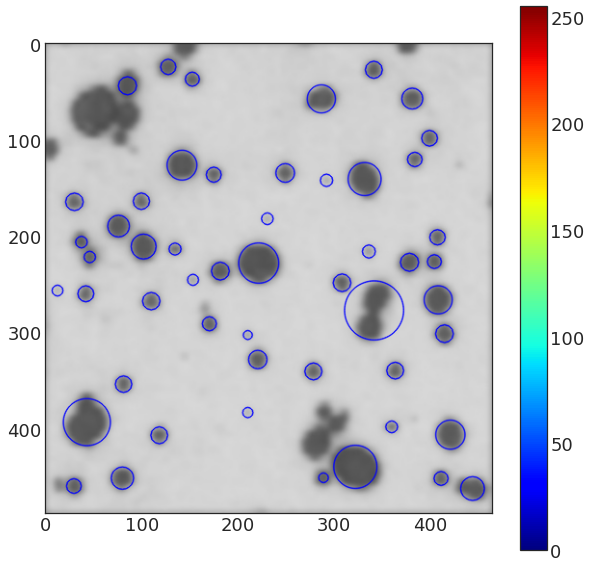

In [100]:
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), 
                                      (0,0,255), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# Show keypoints
plt.figure(figsize=(10,10))
plt.imshow(im_with_keypoints)
plt.colorbar()

In [101]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByArea = False
#params.filterByInertia = False
params.filterByConvexity = False
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(im)

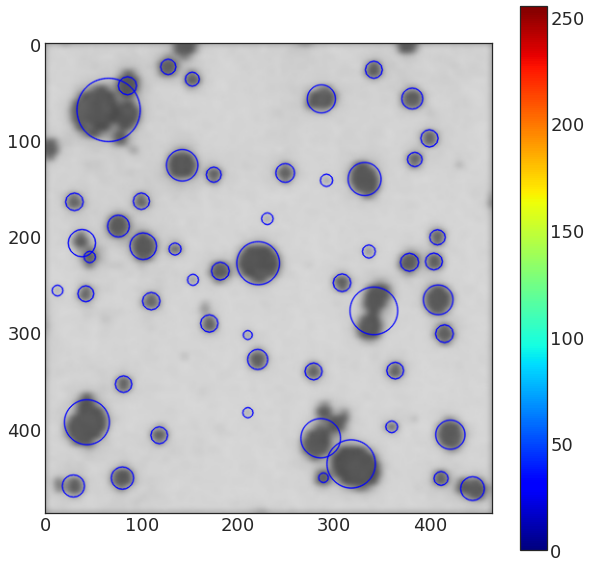

In [102]:
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), 
                                      (0,0,255), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# Show keypoints
plt.figure(figsize=(10,10))
plt.imshow(im_with_keypoints)
plt.colorbar()

In [103]:
from astropy.io import fits

In [981]:
img = fits.getdata("Image_01.fits")

#img = fits.getdata("Image_01.fits")

In [982]:
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
img_r = np.invert(img)


In [983]:
img_r.shape

(2048, 2048)

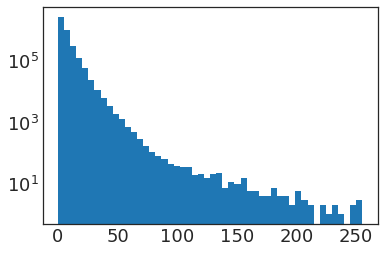

In [984]:
plt.hist(img.flatten(),bins=50);
plt.yscale("log")

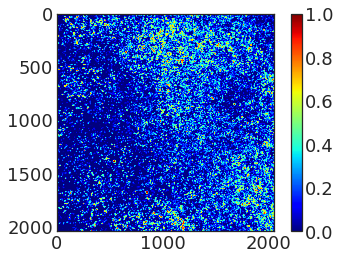

In [985]:
img_thr = img >= 10
plt.imshow(img_thr)
plt.colorbar()

In [992]:
_, thres = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)

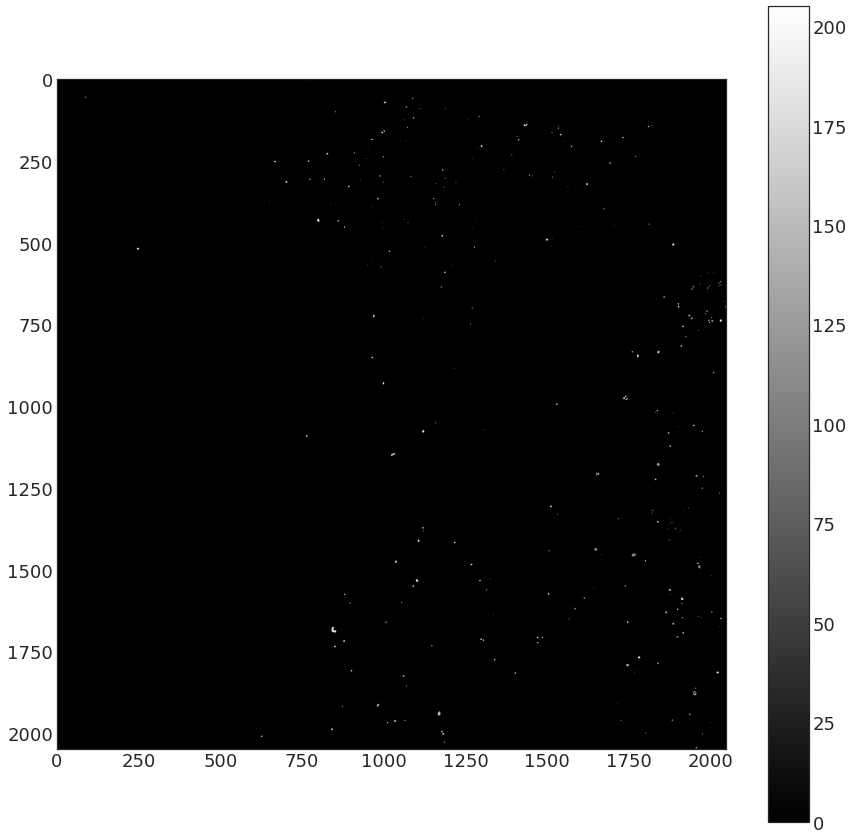

In [993]:
plt.figure(figsize=(15,15))
plt.imshow(np.negative(thres),cmap="gray")
plt.colorbar()

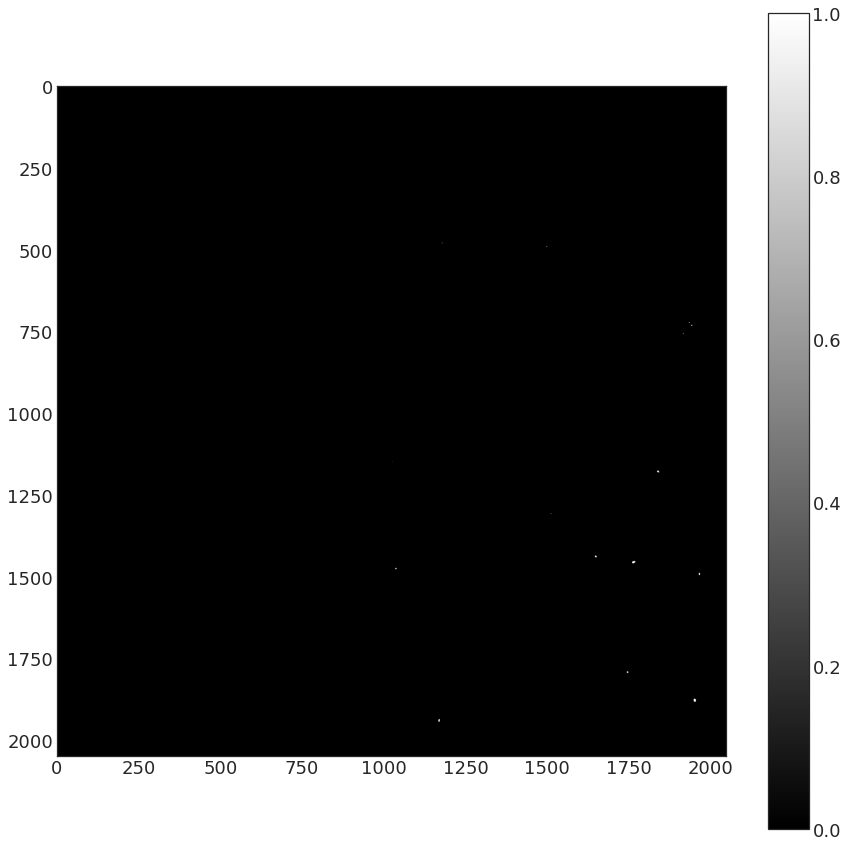

In [991]:
plt.figure(figsize=(15,15))
plt.imshow(img>100,cmap='gray')
plt.colorbar()

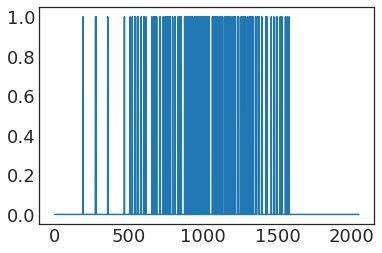

In [958]:
plt.plot((img>10)[:,1000])

In [181]:
img.shape

(2048, 2048)

In [728]:
zoom_img  = img[150:400,850:1050]# img[150:300,900:1000]# img[150:400,850:1050] #img[300:400,950:1050]
#thresh = 210
#zoom_img = cv2.threshold(zoom_img, thresh, 255, cv2.THRESH_BINARY)[1]


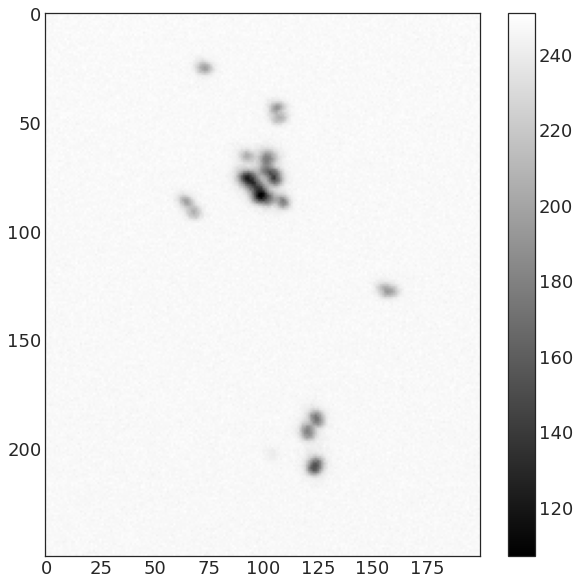

In [729]:
plt.figure(figsize=(10,10))
plt.imshow(zoom_img, cmap="gray")
#plt.xlim(850,1050)
#plt.ylim(150,400)#     <--------- typo?
plt.colorbar()

In [1100]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByArea = False
#params.filterByInertia = False
#params.filterByConvexity = False
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;


#Filter by Area.
params.filterByArea = True
#params.minArea = 10
params.maxArea = 50

# Set Circularity filtering parameters
params.filterByCircularity = False
params.minCircularity = 0.01
 
# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.01
     
# Set inertia filtering parameters
params.filterByInertia = False
params.minInertiaRatio = 0.01
 

# Filter by Circularity
#params.filterByCircularity = True
#params.minCircularity = 0.2
#params.maxCircularity = 1

# Filter by Convexity
#params.filterByConvexity = True
#params.minConvexity = 0.1
#params.maxConvexity = 1

# Filter by InertiaRatio
#params.filterByInertia = True
#params.minInertiaRatio = 0.1
#params.maxInertiaRatio = 1.0

# Distance Between Blobs
params.minDistBetweenBlobs = 0

detector = cv2.SimpleBlobDetector_create(params)

In [1101]:
keypoints = detector.detect(zoom_img)

In [1102]:
len(keypoints)

3

In [1103]:
x_centroids = []
y_centroids = []
for keyPoint in keypoints:
    x_centroids.append(keyPoint.pt[0])
    y_centroids.append(keyPoint.pt[1])
#    s = keyPoint.size
#    print(x,y,s)

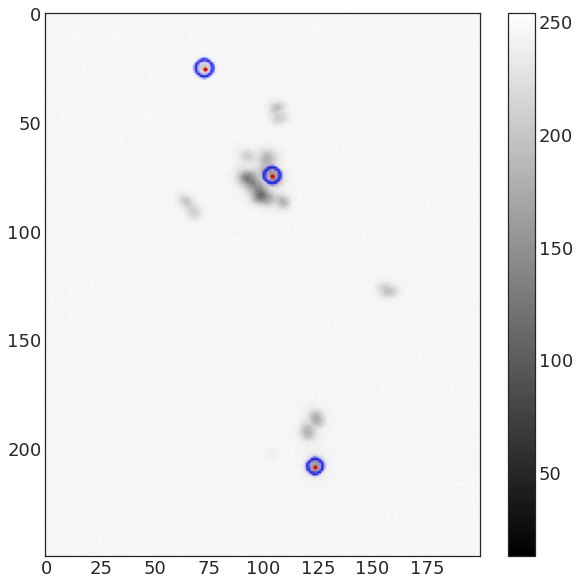

In [1104]:
im_with_keypoints = cv2.drawKeypoints(zoom_img, keypoints, np.array([]), 
                                      (0,0,255), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# Show keypoints
plt.figure(figsize=(10,10))
plt.scatter(x_centroids,y_centroids,c='r',s=10)
#plt.imshow(im_with_keypoints,cmap="gray")
plt.imshow(im_with_keypoints,cmap="gray")
plt.colorbar()

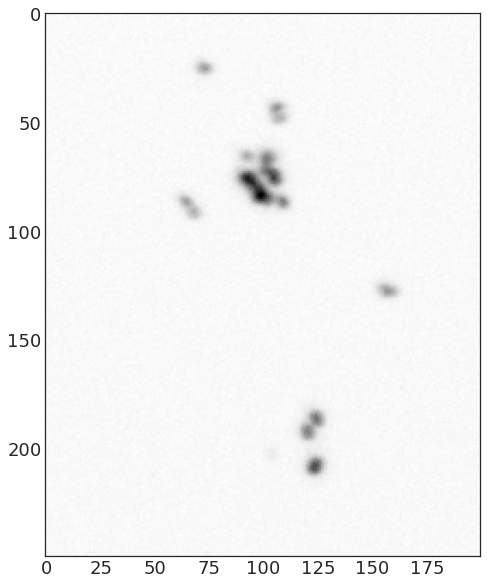

In [813]:
plt.figure(figsize=(10,10))
plt.imshow(zoom_img,cmap="gray")

In [735]:
from math import sqrt

In [779]:
from skimage.feature import blob_dog, blob_log, blob_doh

In [780]:
import skimage
skimage.__version__

'0.19.2'

In [737]:
zoom_img_r = np.invert(zoom_img)

In [1125]:
max_sigma=4.5

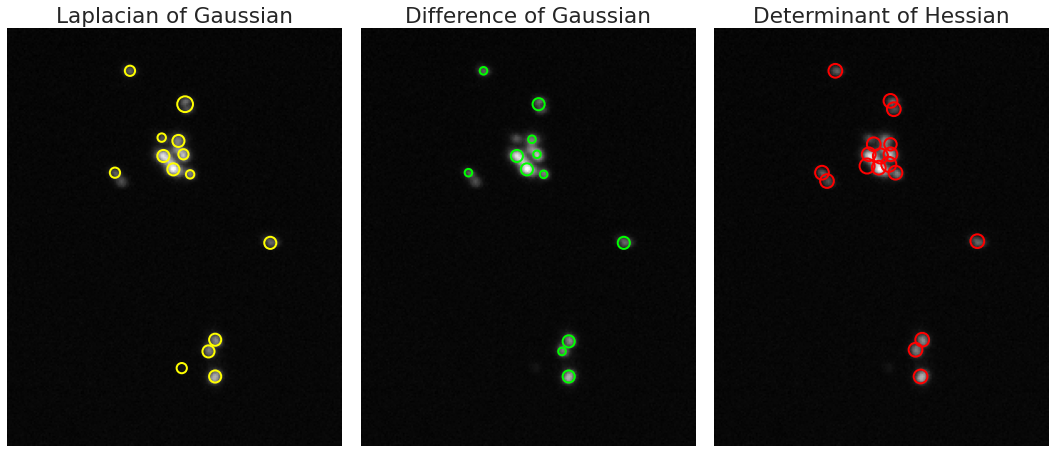

In [1130]:
blobs_log = blob_log(zoom_img_r, max_sigma=max_sigma, num_sigma=10, threshold=.01)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(zoom_img_r, max_sigma=max_sigma, threshold=.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(zoom_img_r, max_sigma=max_sigma, threshold=None, threshold_rel=0.09, overlap=0.5)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(zoom_img_r,cmap="gray")
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

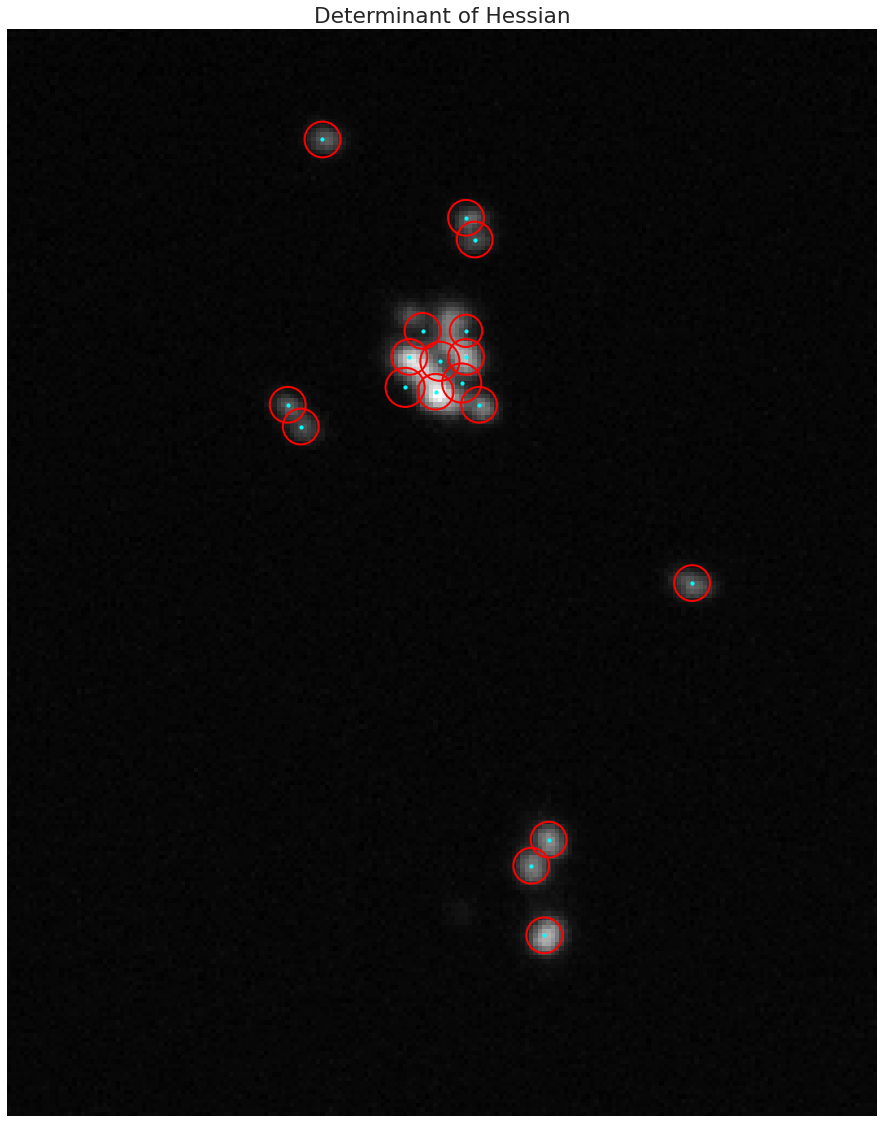

In [1131]:
fig, ax= plt.subplots(figsize=(20,20))
plt.imshow(zoom_img,cmap="gray")
blobs_list = [blobs_doh]
colors = ['red']
titles = ['Determinant of Hessian']

sequence = zip(blobs_list, colors, titles)

for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title(title)
    ax.imshow(zoom_img_r,cmap="gray")
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        plt.scatter(x,y,c='cyan',s=10)
        ax.add_patch(c)
    ax.set_axis_off()


In [852]:
from skimage.feature import match_template
from skimage.feature import peak_local_max # new import!


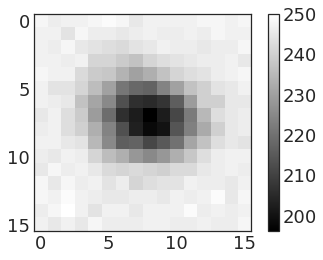

In [877]:
src_patch = zoom_img[18:34,65:81]
plt.imshow(src_patch,cmap="gray")
plt.colorbar()

In [878]:
src_patch.shape

(16, 16)

In [994]:
test_img = zoom_img

In [995]:
test_img.shape

(250, 200)

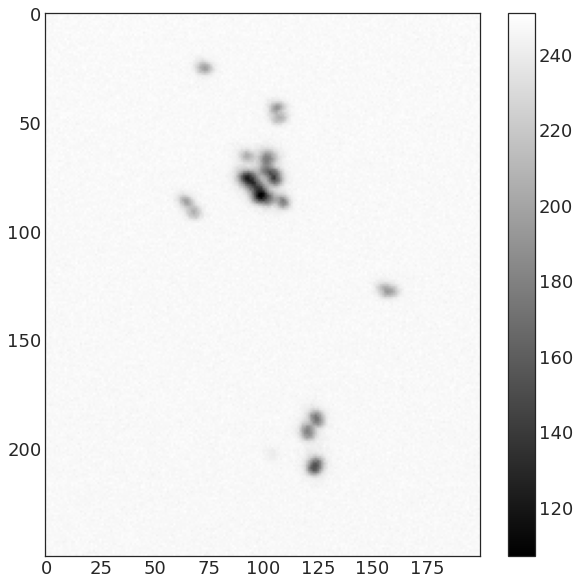

In [996]:
plt.figure(figsize=(10,10))
plt.imshow(test_img,cmap="gray")
plt.colorbar()

In [997]:
result = match_template(test_img, src_patch, pad_input=True)

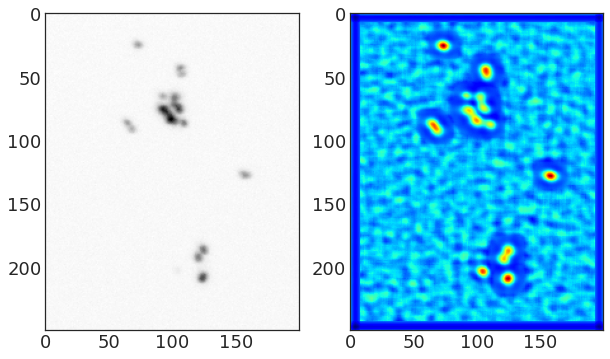

In [998]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
g0=axs[0].imshow(test_img,cmap="gray")
g1=axs[1].imshow(result)

In [999]:
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)

In [1073]:
thresholds = filters.threshold_multiotsu(test_img, classes=5)
regions = np.digitize(test_img, bins=thresholds)

In [1074]:
thresholds

array([164, 199, 223, 240])

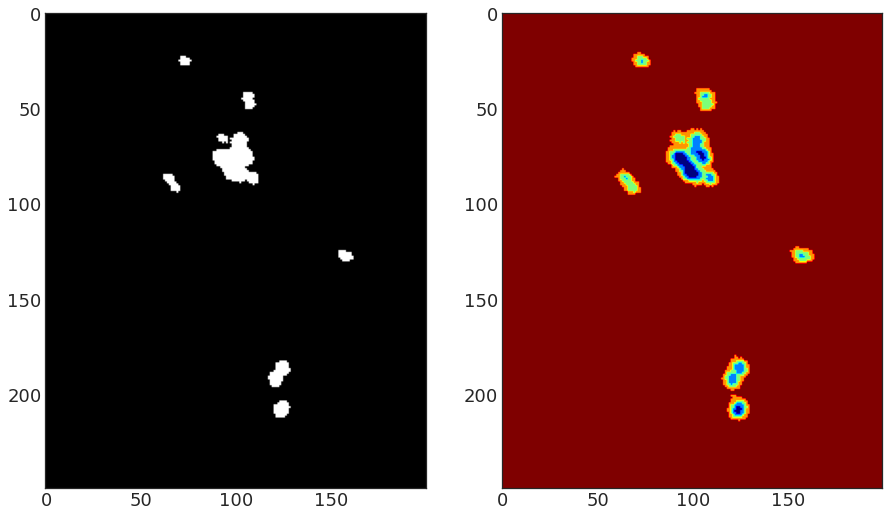

In [1076]:
fig, axs = plt.subplots(1,2,figsize=(15,15))
g0=axs[0].imshow(test_img<thresholds[2],cmap="gray")
g1=axs[1].imshow(regions)

In [1077]:
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
from scipy import ndimage

In [1078]:
image = test_img<thresholds[2]
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(
    distance, indices=False, footprint=np.ones((5, 5)), labels=image)
markers = measure.label(local_maxi)

/tmp/ipykernel_27961/4201364906.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(


In [1079]:
markers[~image] = -1
labels_rw = random_walker(image, markers)


In [1080]:
labels_rw.max()

14

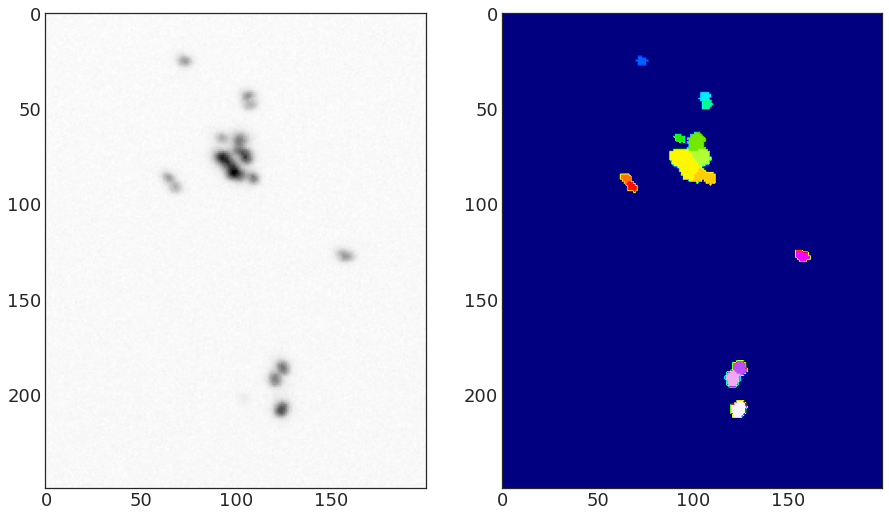

In [1141]:
fig, axs = plt.subplots(1,2,figsize=(15,15))
g0=axs[0].imshow(test_img,cmap="gray")
g1=axs[1].imshow(labels_rw, cmap='gist_ncar')
#plt.colorbar(g1)

In [1168]:
from skimage.measure import label, regionprops, regionprops_table
import matplotlib.patches as mpatches

In [1157]:
new_regions = regionprops(labels_rw)

In [1181]:
test_img.shape

(250, 200)

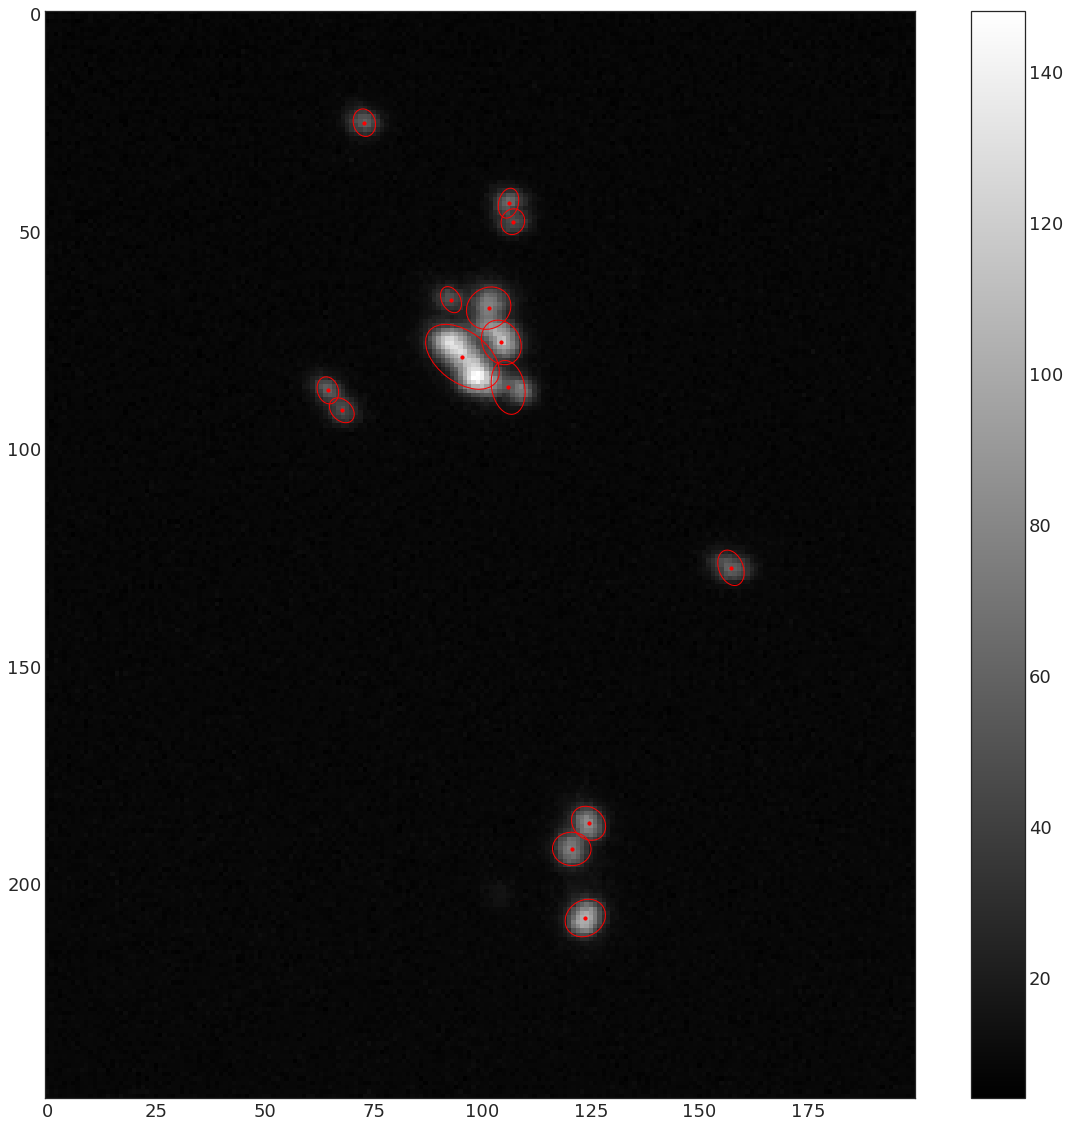

In [1191]:
fig, ax= plt.subplots(figsize=(20,20))
g0=ax.imshow(zoom_img_r,cmap="gray")
plt.colorbar(g0)
for props in new_regions:
    y, x = props.centroid
    r = np.sqrt(props.area/np.pi)
    #c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
    minor,major,angle = props.axis_minor_length,props.axis_major_length,props.orientation*180./np.pi
    ellipse = mpatches.Ellipse(xy=(x, y),fill=False,width=major,height=minor,angle=angle,color="red")
    plt.scatter(x,y,c='red',s=10)
    #x.add_patch(c)
    ax.add_patch(ellipse)


In [1204]:
from skimage.feature import shape_index

In [1236]:
s = shape_index(zoom_img_r,mode='reflect')

In [1237]:
s.shape

(250, 200)

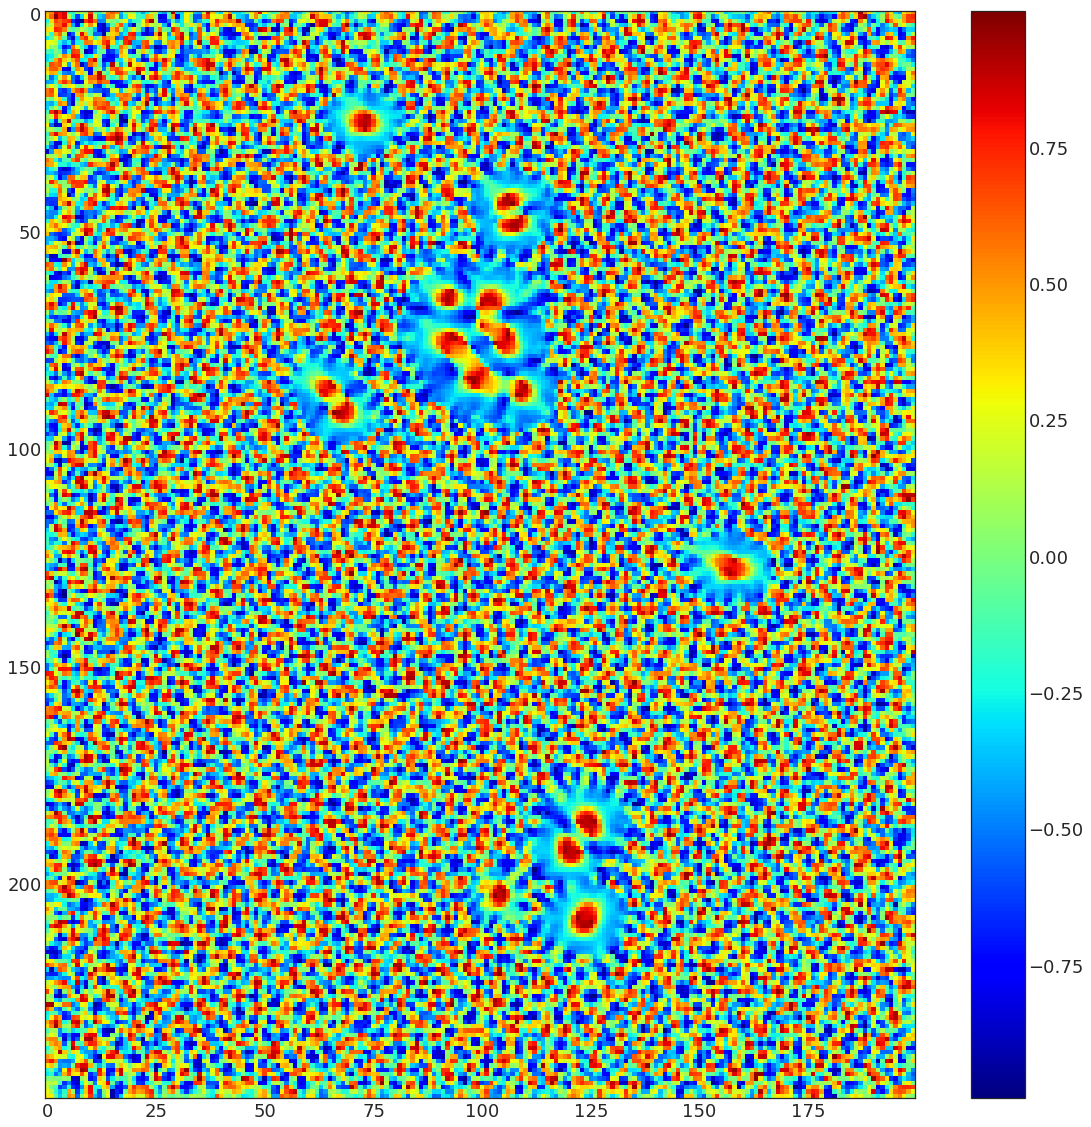

In [1238]:
fig, ax= plt.subplots(figsize=(20,20))
plt.imshow(s)
plt.colorbar()

In [1239]:
from scipy import ndimage as ndi

In [1267]:
s_smooth = ndi.gaussian_filter(s, sigma=1.5)

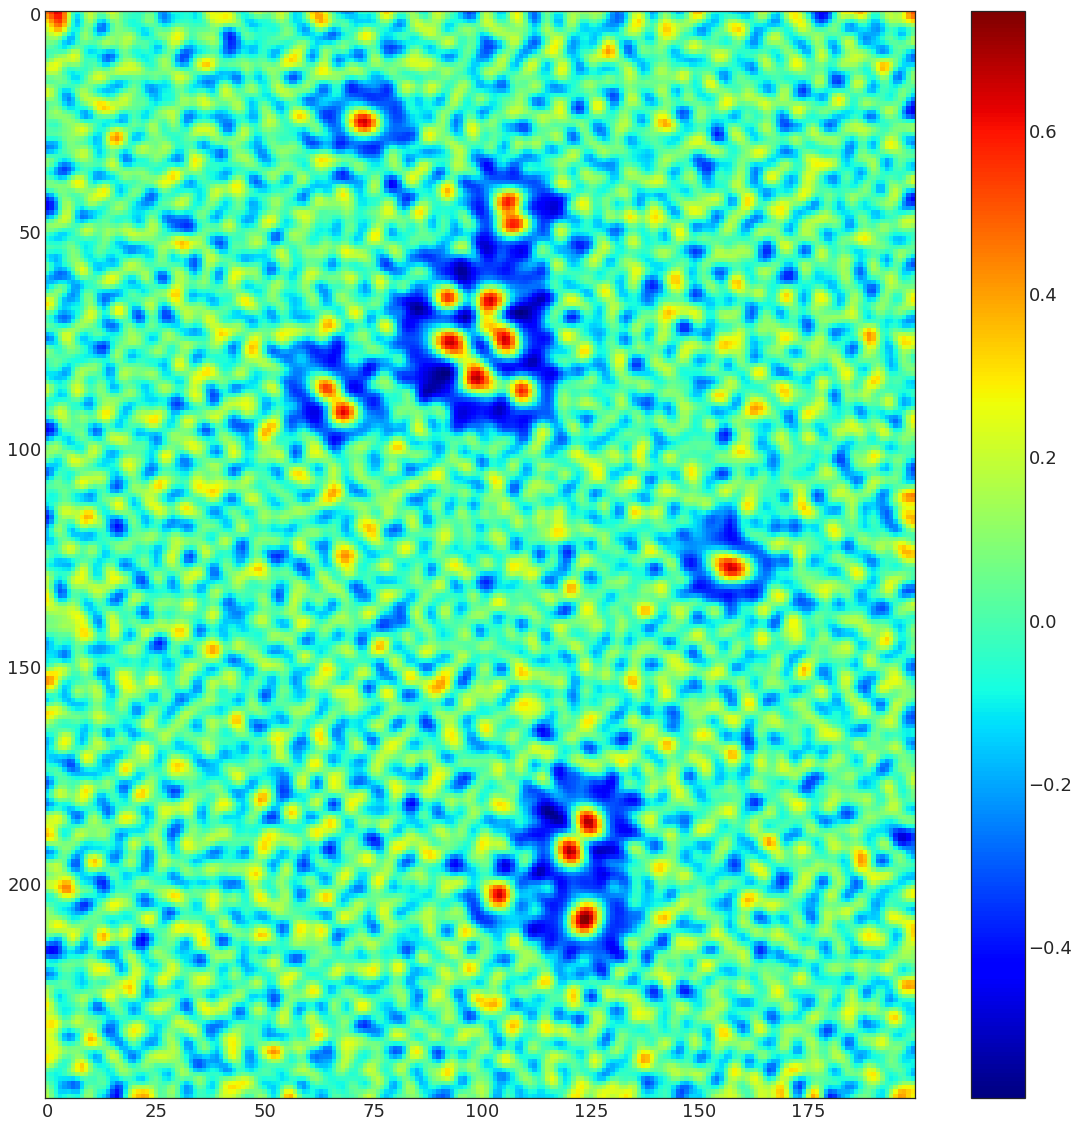

In [1268]:
fig, ax= plt.subplots(figsize=(20,20))
plt.imshow(s_smooth)
plt.colorbar()

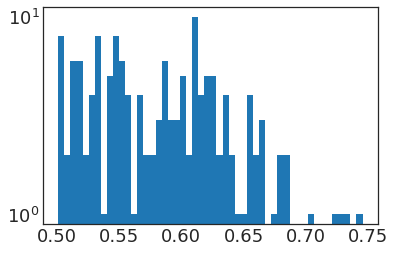

In [1272]:
plt.hist((s_smooth[s_smooth>0.5]).flatten(),bins=50)
plt.yscale("log")

In [1359]:
target = 0.65
delta = 0.2
point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = zoom_img_r[point_y_s, point_x_s]

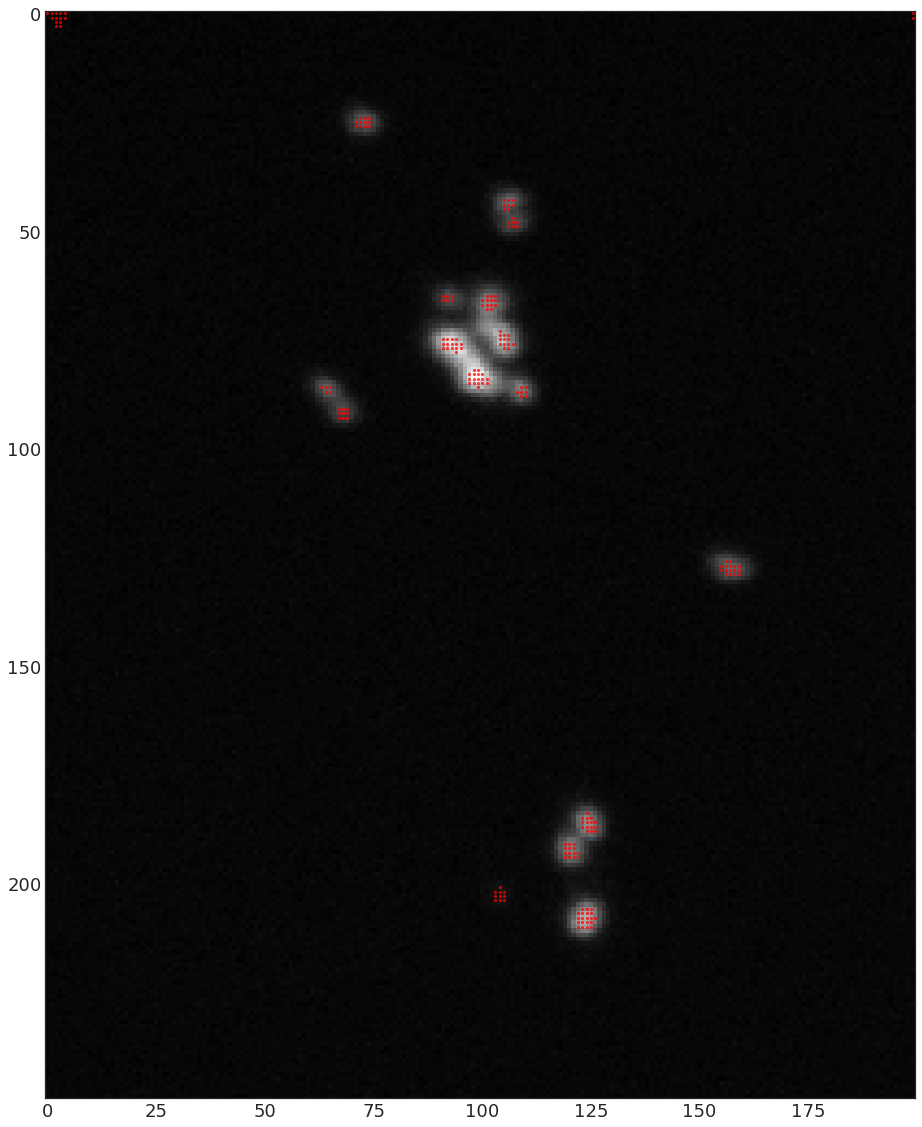

In [1360]:
fig, ax= plt.subplots(figsize=(20,20))
g0=ax.imshow(zoom_img_r,cmap="gray")
scatter_settings = dict(alpha=0.75, s=10, linewidths=0)
ax.scatter(point_x_s, point_y_s, color='red', **scatter_settings)

In [1361]:
new_img = np.zeros_like(zoom_img_r)
new_img[point_y_s, point_x_s]=zoom_img_r[point_y_s, point_x_s]

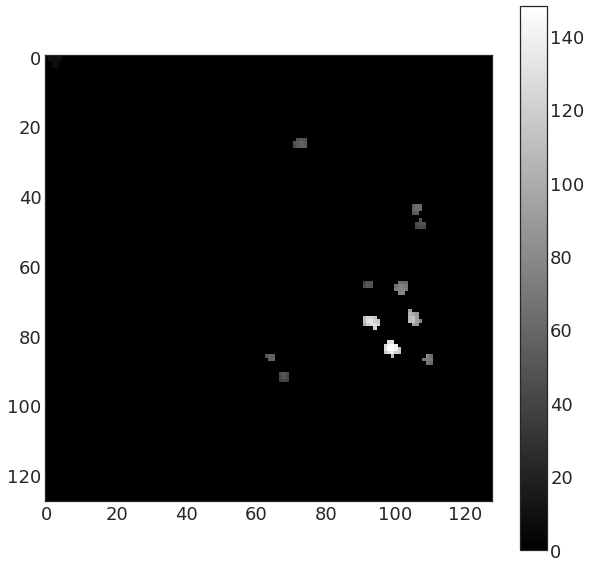

In [1362]:
fig, ax= plt.subplots(figsize=(10,10))
plt.imshow(new_img[:128,:128],cmap='gray')
plt.colorbar()

In [1363]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = False
#params.minArea = 5
#params.maxArea = 50

params.filterByInertia = False
params.filterByConvexity = False
params.filterByCircularity=False
params.filterByColor=False
params.minThreshold = 0;
params.maxThreshold = 255;
# Distance Between Blobs
params.minDistBetweenBlobs = 0

detector = cv2.SimpleBlobDetector_create(params)

In [1364]:
keypoints = detector.detect(new_img)

In [1365]:
x_centroids = []
y_centroids = []
for keyPoint in keypoints:
    x_centroids.append(keyPoint.pt[0])
    y_centroids.append(keyPoint.pt[1])


In [1366]:
x_centroids

[123.63723754882812,
 104.0,
 120.31121826171875,
 124.41864776611328,
 157.05104064941406,
 67.95555877685547,
 109.22222137451172,
 64.26851654052734,
 98.797607421875,
 93.0482177734375,
 105.0759048461914,
 101.55833435058594,
 92.04444122314453,
 107.0,
 105.96598815917969,
 72.67171478271484]

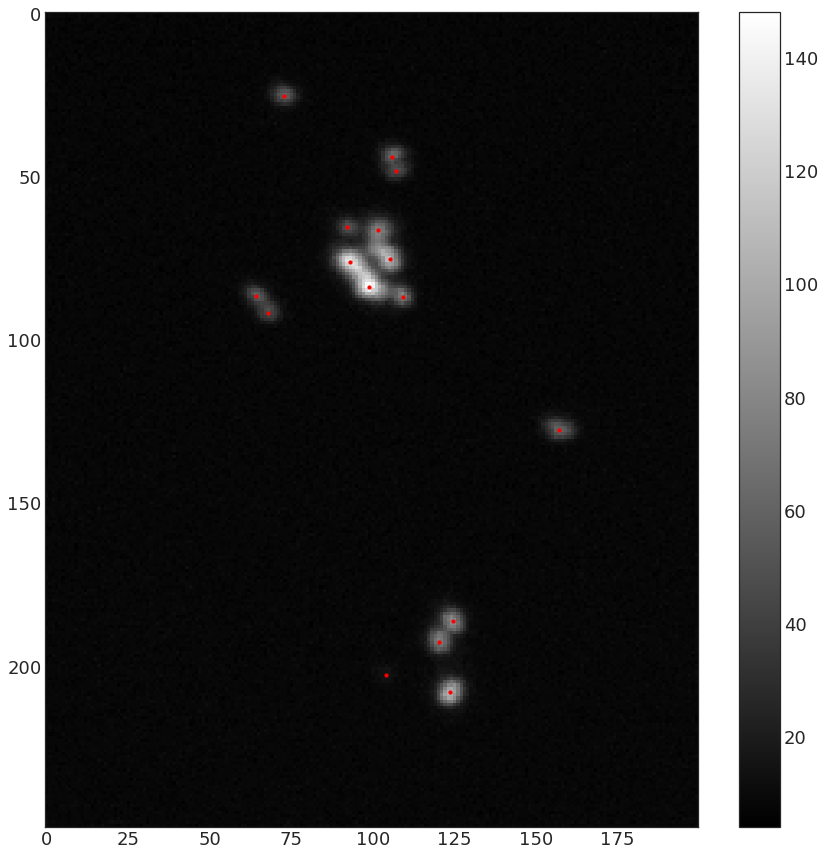

In [1367]:
im_with_keypoints = cv2.drawKeypoints(new_img, keypoints, np.array([]), 
                                      (0,0,255), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# Show keypoints
plt.figure(figsize=(15,15))
plt.scatter(x_centroids,y_centroids,c='r',s=10)
#plt.imshow(im_with_keypoints,cmap="gray")
plt.imshow(zoom_img_r,cmap="gray")
plt.colorbar()